# Inlämningsuppgift: Del 2 - Adversarial input attack

Förnamn Efternamn \
olsj21@student.bth.se

Förnamn Efternamn \
admt21@student.bth.se

# Instruktioner

Ändra notebookens platshållare så som era namn- och mailuppgifter samt instruktioner i de olika avsnitten. 

Notebookens underrubriker på nivå 3 (###) är bara ett enkelt exempel på hur er implementation kan delas upp. Ni bör skapa egna rubriker anpassade efter er implementation men lämna alla nivå 1 (#) och 2-rubriker (##) som de är. En viktig del inom data-science är att kunna presentera sina metoder och resultat på ett tydligt sätt. **En ostrukturerad och otydlig notebook kan påverka betygsättningen.**

Notera att t.ex. hyperparameter-tuning och annan optimisering för prestanda inte är nödvändigt i denna uppgift. Så länge modellen fungerar märkvärt bättre än ett "coin flip" så räcker det att ni väljer era hyperparametrar manuellt.

# Uppgiften

Uppgiften går ut på att göra så att bilden på koalan nedan klassificeras som en traktor istället. Givetvis ska bilden på koalan se helt oförändrad ut för det mänskliga ögat då attacken är genomförd. Nedan följer Pythonkod som läser in de båda bilderna som uppgiften bygger på samt läser in en ResNet50-modell som klassiciferar bilderna. Saknar ni några Python-paket, t.ex. TensorFlow så installera dem med en pakethanterarare, t.ex. pip

## Beskrivning av adversarial input attacker

Börja med att förklara vad denna typ av attacker är och hur de fungerar i rapportens sektion 2.1.

## Nedan följer kod för att läsa in bilderna och klassificera dem med ResNet50 modellen

In [138]:
from matplotlib import pyplot as plt
import numpy as np

import tensorflow as tf
import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

from art.estimators.classification import KerasClassifier, TensorFlowV2Classifier
from art.attacks.evasion import BoundaryAttack, DeepFool, FastGradientMethod
from art.utils import to_categorical
tf.compat.v1.enable_eager_execution()
#tf.compat.v1.disable_eager_execution()

print(f"TensorFlow: {tf.__version__}")

TensorFlow: 2.18.0


In [139]:
# Loads the pretrained ResNet50 model
model = ResNet50(weights='imagenet')
# Number of classes in the model
print(f"Number of classes: {model.output_shape[1]}")



Number of classes: 1000


In [140]:

# Load the two images (koala & tractor)
init_image = image.load_img("images/koala.jpeg", target_size=(224, 224))
init_image = image.img_to_array(init_image)

target_image = image.load_img("images/tractor.jpeg", target_size=(224, 224))
target_image = image.img_to_array(target_image)

class_lookup = {105: "koala", 866: "tractor"}

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Init image class label: 105 (koala)


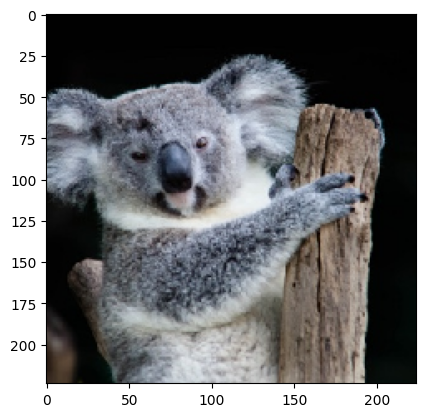

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Target image class label: 866 (tractor)


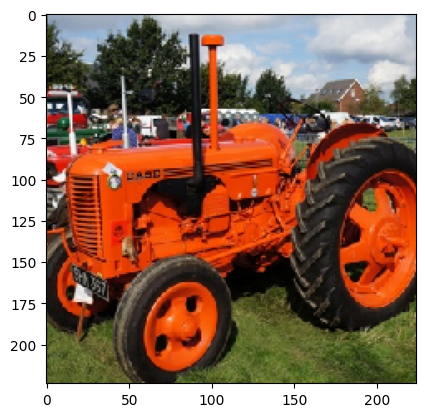

In [141]:

init_class_id = np.argmax(model.predict(np.array([init_image])))
print(f"Init image class label: {init_class_id} ({class_lookup[init_class_id]})")
plt.imshow(init_image.astype(np.uint))
plt.show()

target_class_id = np.argmax(model.predict(np.array([target_image])))
print(f"Target image class label: {target_class_id} ({class_lookup[target_class_id]})")
plt.imshow(target_image.astype(np.uint))
plt.show()

## Implementation av er attack

Beskriv i er rapport vad just er valda attack kallas och i detalj hur den fungerar (sektion 2.2 i rapporten). Beskriv även kort vilka bibliotek ni använder för att implementera den.

## Er kod för attacken

I cellerna nedan lägger ni in er egen kod för att genomföra attacken.

### Bibliotek

In [142]:
# Samla era import statements här e.g.
from art.attacks.evasion import ProjectedGradientDescent
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50

from art.estimators.classification import TensorFlowV2Classifier
from art.attacks.evasion import ProjectedGradientDescent
from art.utils import to_categorical



### Egna funktioner

In [199]:
# Samla era egna funktioner relaterade till attacken här
# Funktionerna ska kort beskrivas med docstrings och kommentarer så att man förstår syftet och implementationen
# Blir det många bör ni bryta ut dessa i en separat fil

def generate_adversarial_example(classifier, init_image, target_class_id):
    """
    Generates an adversarial example from an initial image and a target class id
    :param init_image: The initial image
    :param target_class_id: The target class id
    :return: The adversarial image
    """
    # Generate adversarial examples
    df = ProjectedGradientDescent(classifier, eps=3, eps_step=0.1, max_iter=100, targeted=True)
    # Predict the class label of the adversarial example
    adversarial_image = df.generate(x=np.array([init_image]), y=to_categorical([target_class_id], 1000))
    return adversarial_image

def lookup_class_name(class_id, class_lookup):
    """
    Looks up the class name based on the class id
    :param class_id: The class id
    :param class_lookup: The lookup dictionary
    :return: The class name
    """
    return class_lookup[class_id][0]

### Förberedelser

In [144]:
# E.g. inläsning av modell och dataset
tf.compat.v1.enable_eager_execution()


### Modellering

In [145]:
# E.g. träning

# Compile the model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier = TensorFlowV2Classifier(model=model, nb_classes=1000, input_shape=(224, 224, 3), loss_object=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam())



### Attack

Beskriv attackprocessen kortfattat här

Adversarial image class label: 866 ([np.int64(866)])


/tmp/ipykernel_14779/2197960261.py:6: RuntimeWarning: invalid value encountered in cast
  plt.imshow(adversarial_image[0].astype(np.uint))


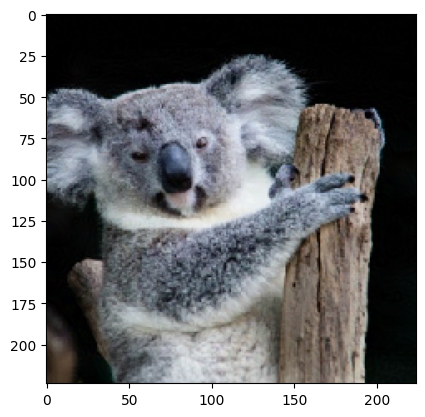

In [146]:
# Attackutförande

adversarial_image = generate_adversarial_example(classifier, init_image, target_class_id)
adversarial_class_id = np.argmax(classifier.predict(adversarial_image))
print(f"Adversarial image class label: {adversarial_class_id} ({[adversarial_class_id]})")
plt.imshow(adversarial_image[0].astype(np.uint))

### Attackresultat

Summera och förklara era attackresultat i flytande text här

/tmp/ipykernel_14779/2291966493.py:7: RuntimeWarning: invalid value encountered in cast
  axs[1].imshow(diff.astype(np.uint))
/tmp/ipykernel_14779/2291966493.py:9: RuntimeWarning: invalid value encountered in cast
  axs[2].imshow(adversarial_image[0].astype(np.uint))


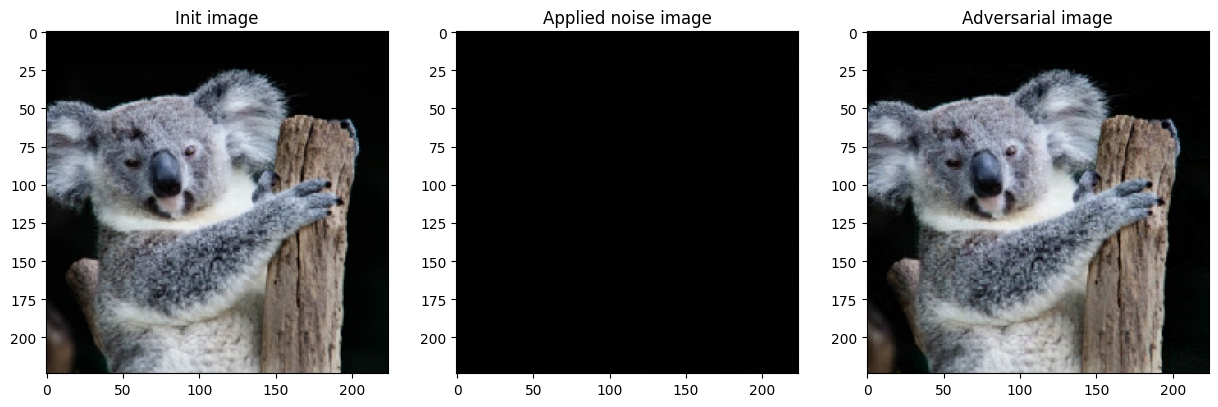

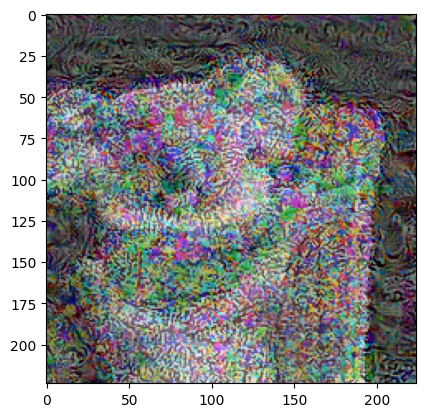

In [147]:
# Presentera attackens resultat m.h.a. kod här

diff = adversarial_image[0] - init_image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(init_image.astype(np.uint))
axs[0].set_title("Init image")
axs[1].imshow(diff.astype(np.uint))
axs[1].set_title("Applied noise image")
axs[2].imshow(adversarial_image[0].astype(np.uint))
axs[2].set_title("Adversarial image")
plt.show()

#Show differences between original and adversarial image and normalize the differences
diff = adversarial_image[0] - init_image
diff = (diff - diff.min()) / (diff.max() - diff.min())
plt.imshow(diff)

# Add the original image and make it transparent
plt.imshow(init_image.astype(np.uint))
plt.imshow(diff, alpha=0.5)
plt.show()



## Skyddsåtgärder

Beskriv (i rapportens sektion 2.3) vilka säkerhetsåtgärd(er) ni valt som lämpliga för att skydda mot er attack. Motivera varför ni valt just de(n) metod(erna).

## Implementation av skyddsåtgärder (frivilligt endast för A eller B)

Nedan fyller ni i er kod som implementerar skyddsmekanismen mot er attackmetod. Skriv även en summering av vad skyddsresultatet blev när ni implementerade metoden (beskriv detta i rapportens del 2.4).

### Egna funktioner

In [172]:
# Samla era egna funktioner relaterade till säkerhetsåtgärden här
# Funktionerna ska kort beskrivas med docstrings och kommentarer så att man förstår syftet och implementationen
# Blir det många bör ni bryta ut dessa i en separat fil

def generate_restored_image(adv_image, noise):
    """
    Generates a defence for an adversarial image
    :param adv_image: The adversarial image
    :return: The defended image
    """
    defence_noise = np.random.normal(0, noise, size=adv_image[0].shape)
    defended_image = adversarial_image + defence_noise
    return defended_image

def get_defence_noise(init_image, restored_image):
    """
    Generates the noise that was added to the adversarial image to restore it
    :param init_image: The initial image
    :param restored_image: The restored image
    :return: The noise
    """
    diff = restored_image[0] - init_image
    diff = (diff - diff.min()) / (diff.max() - diff.min())
    return diff

### Förberedelser

In [212]:
# E.g. skapande av ny modell, etc.
with open("imagenet-classes.txt", "r") as f:
    classes_labels = f.readlines()



classes_labels = [c.replace("\n","").replace(" ","").split(",") for c in classes_labels]
classes_labels
    


[['tench', 'Tincatinca'],
 ['goldfish', 'Carassiusauratus'],
 ['greatwhiteshark',
  'whiteshark',
  'man-eater',
  'man-eatingshark',
  'Carcharodoncarcharias'],
 ['tigershark', 'Galeocerdocuvieri'],
 ['hammerhead', 'hammerheadshark'],
 ['electricray', 'crampfish', 'numbfish', 'torpedo'],
 ['stingray'],
 ['cock'],
 ['hen'],
 ['ostrich', 'Struthiocamelus'],
 ['brambling', 'Fringillamontifringilla'],
 ['goldfinch', 'Cardueliscarduelis'],
 ['housefinch', 'linnet', 'Carpodacusmexicanus'],
 ['junco', 'snowbird'],
 ['indigobunting', 'indigofinch', 'indigobird', 'Passerinacyanea'],
 ['robin', 'Americanrobin', 'Turdusmigratorius'],
 ['bulbul'],
 ['jay'],
 ['magpie'],
 ['chickadee'],
 ['waterouzel', 'dipper'],
 ['kite'],
 ['baldeagle', 'Americaneagle', 'Haliaeetusleucocephalus'],
 ['vulture'],
 ['greatgreyowl', 'greatgrayowl', 'Strixnebulosa'],
 ['Europeanfiresalamander', 'Salamandrasalamandra'],
 ['commonnewt', 'Triturusvulgaris'],
 ['eft'],
 ['spottedsalamander', 'Ambystomamaculatum'],
 ['axo

### Skydd

Beskriv säkerhetsåtgärden kortfattat här

/tmp/ipykernel_14779/4080477762.py:7: RuntimeWarning: invalid value encountered in cast
  axs[0][i].imshow(defence_image[0].astype(np.uint))
/tmp/ipykernel_14779/4080477762.py:10: RuntimeWarning: invalid value encountered in cast
  axs[2][i].imshow((init_image-defence_image[0]).astype(np.uint))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..258].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..271].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..298].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..366].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..561].
Clipping input data to the valid range for imshow with

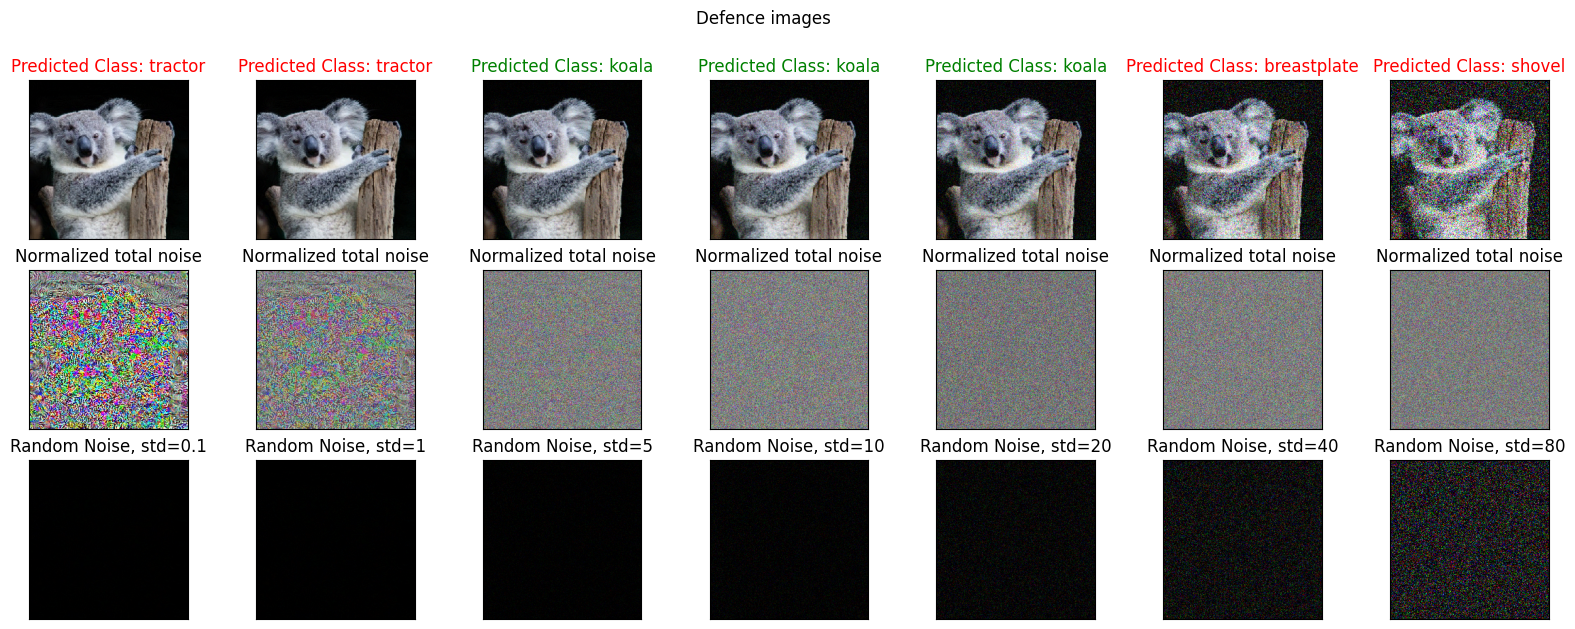

In [230]:
# Implementation av skyddsåtgärd
noises = [0.1, 1, 5, 10, 20, 40, 80]
fig, axs = plt.subplots(3, len(noises), figsize=(20, 7), sharex=True, sharey=True)
fig.suptitle("Defence images")
for i, noise in enumerate(noises):
    defence_image = generate_restored_image(adversarial_image, noise)
    axs[0][i].imshow(defence_image[0].astype(np.uint))
    noise_image = get_defence_noise(init_image, defence_image)
    axs[1][i].imshow(noise_image)
    axs[2][i].imshow((init_image-defence_image[0]).astype(np.uint))
    axs[0][i].xaxis.set_visible(False)
    axs[1][i].xaxis.set_visible(False)
    axs[1][i].yaxis.set_visible(False)
    axs[0][i].yaxis.set_visible(False)
    axs[2][i].yaxis.set_visible(False)
    axs[2][i].xaxis.set_visible(False)
    pred = np.argmax(classifier.predict(defence_image))
    class_name = lookup_class_name(pred, classes_labels)
    # Make disp name red, unless it is koala, in which case make it green
    color = "red" if class_name != "koala" else "green"
    axs[0][i].set_title(f"Predicted Class: {class_name}", color=color)
    axs[1][i].set_title(f"Normalized total noise")
    axs[2][i].set_title(f"Random Noise, std={noise}")

# for i in [0.1, 0.5, 1, 2, 5, 10]:
#     defence_noise = np.random.normal(0, i, size=adversarial_image[0].shape)
#     defence_image = adversarial_image + defence_noise
#     plt.imshow(defence_image[0].astype(np.uint))

#     # predict the class label of the adversarial example
#     defence_class_id = np.argmax(model.predict(defence_image))
#     print(f"Defence image class label: {defence_class_id}")

#     # Show the differences between the init image and defence image

#     diff = defence_image[0] - init_image
#     diff = (diff - diff.min()) / (diff.max() - diff.min())
#     plt.imshow(diff)
#     plt.show()


### Skyddsresultat

Bevisa och förklara era skyddsresultat i flytande text här

In [151]:
# Presentera skyddåtgärdens resultat m.h.a. kod här

# Referenser

Lista era referenser här. E.g. var ni hittat information om attacken, skyddsåtgärder eller bibliotekets dokumentation/repository.